In [1]:
import torch
print(torch.__version__)

2.7.0+cu118


In [2]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [3]:
#set up device agnostic coding
if torch.cuda.is_available():
    device ="cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device ="cpu"
print(f"using device ={device}")

using device =cpu


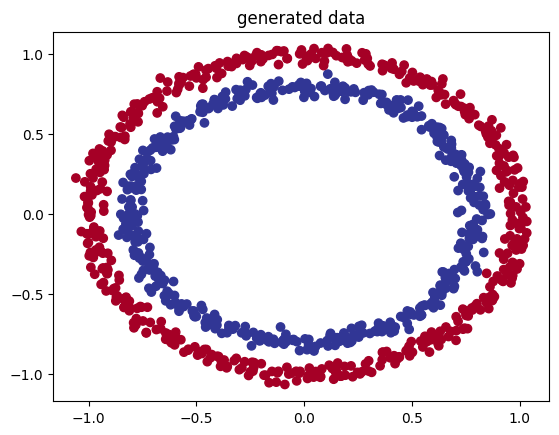

In [4]:
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);
plt.title('generated data')
plt.show()

In [5]:
print (f"Before {type(X)}, {type(y)}")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"After {type(X)}, {type(y)}")

Before <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
After <class 'torch.Tensor'>, <class 'torch.Tensor'>


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

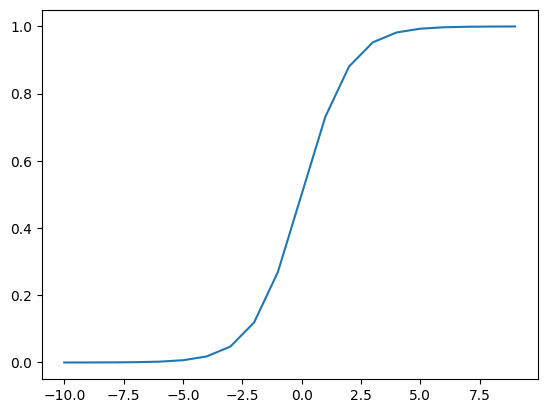

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


val = range(-10, 10)
sigmoid_val = [sigmoid(n) for n in val]
plt.plot(val, sigmoid_val);

In [8]:
print(f"{sigmoid(100):.10f}")

1.0000000000


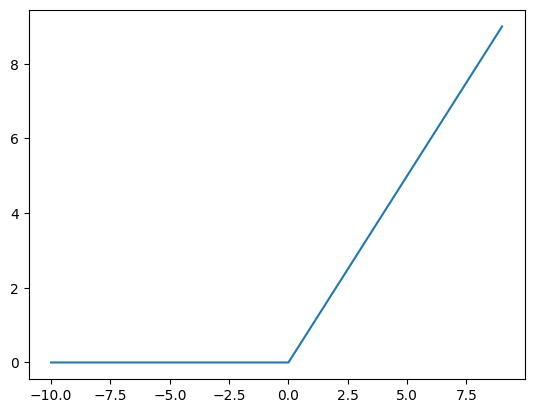

In [9]:
def relu(z):
    if z<=0:
        return 0
    else:
        return z
    

val = range(-10,10)
relu_val = [relu(n) for n in val]
plt.plot(val, relu_val)

In [10]:
class firstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        #something goes here



    def forward(self,x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x
        #something goes here

In [11]:
model = firstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([[-0.0696,  0.6162],
         [-0.6911, -0.6742],
         [-0.6426, -0.5319],
         [ 0.4872, -0.5146],
         [-0.1431, -0.4765],
         [ 0.6472,  0.2627],
         [-0.5325, -0.4146],
         [-0.6629, -0.0693],
         [ 0.3730, -0.1069],
         [-0.0987,  0.2664]], requires_grad=True),
 Parameter containing:
 tensor([-0.4430, -0.4739, -0.5807, -0.2280, -0.6083, -0.1545, -0.3140,  0.4242,
         -0.6064,  0.1238], requires_grad=True),
 Parameter containing:
 tensor([[ 2.0191e-01,  3.0150e-01,  6.3720e-02,  2.5969e-01,  1.6879e-01,
          -1.1829e-01,  2.7004e-03,  1.8896e-01,  2.4109e-01,  8.0737e-02],
         [-2.6662e-01,  1.0388e-01,  2.0119e-01, -2.6687e-01, -4.4902e-02,
           2.4679e-01, -2.3856e-01,  3.0922e-01, -3.0092e-01,  6.6976e-02],
         [ 2.0588e-01, -1.7082e-01, -3.0167e-01,  2.8547e-01, -3.0717e-02,
          -4.3849e-02, -5.3147e-02, -1.9142e-01,  2.7412e-01, -1.9937e-01],
         [-2.9114e-01,  2.4401e-01, 

In [12]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.05
)


In [13]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [14]:
epochs = 4000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)
model.to(device)
for epoch in range(epochs):
    ##Training
    model.train()
    # 1. forward pass
    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    #2. computer training loss
    loss = loss_fn(y_logits, y_train)
    #3. zero grad the optimizer 
    optimizer.zero_grad()
    #4. backpropagates
    loss.backward()
    #5. step the optimizer 
    optimizer.step()

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
    
    ### testing 
    model.eval()
    with torch.inference_mode():
        test_logits = model (X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    if (epoch+1)%50 == 0:
        print(f'Epoch {epoch+1}| Train Loss: {loss:.4f} | Train ACC: {acc} | Test Loss:{test_loss:.4f}| Test ACC:{test_acc}')
    trainLossList.append (loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch 50| Train Loss: 0.6958 | Train ACC: 54.625 | Test Loss:0.6937| Test ACC:54.0
Epoch 100| Train Loss: 0.6944 | Train ACC: 49.875 | Test Loss:0.6928| Test ACC:53.0
Epoch 150| Train Loss: 0.6935 | Train ACC: 47.75 | Test Loss:0.6924| Test ACC:54.50000000000001
Epoch 200| Train Loss: 0.6928 | Train ACC: 50.125 | Test Loss:0.6920| Test ACC:54.0
Epoch 250| Train Loss: 0.6921 | Train ACC: 54.0 | Test Loss:0.6916| Test ACC:56.99999999999999
Epoch 300| Train Loss: 0.6914 | Train ACC: 56.49999999999999 | Test Loss:0.6912| Test ACC:56.00000000000001
Epoch 350| Train Loss: 0.6907 | Train ACC: 56.875 | Test Loss:0.6907| Test ACC:54.50000000000001
Epoch 400| Train Loss: 0.6899 | Train ACC: 60.25 | Test Loss:0.6902| Test ACC:56.99999999999999
Epoch 450| Train Loss: 0.6890 | Train ACC: 67.25 | Test Loss:0.6897| Test ACC:64.5
Epoch 500| Train Loss: 0.6880 | Train ACC: 69.0 | Test Loss:0.6891| Test ACC:63.0
Epoch 550| Train Loss: 0.6869 | Train ACC: 69.25 | Test Loss:0.6884| Test ACC:67.0
Epoch 600

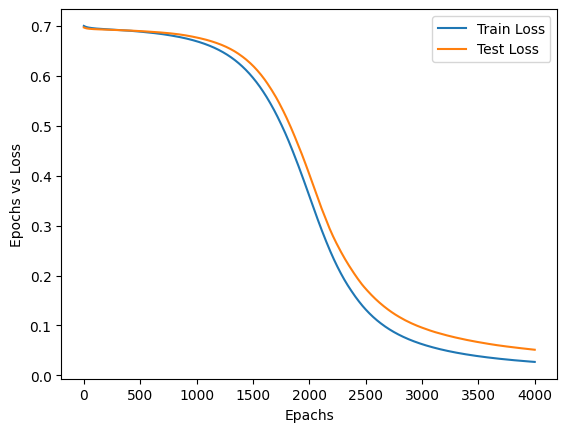

In [16]:
plt.plot(range(epochs), trainLossList, label='Train Loss')
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.legend()
plt.xlabel("Epachs")
plt.ylabel("Epochs vs Loss")
plt.show()


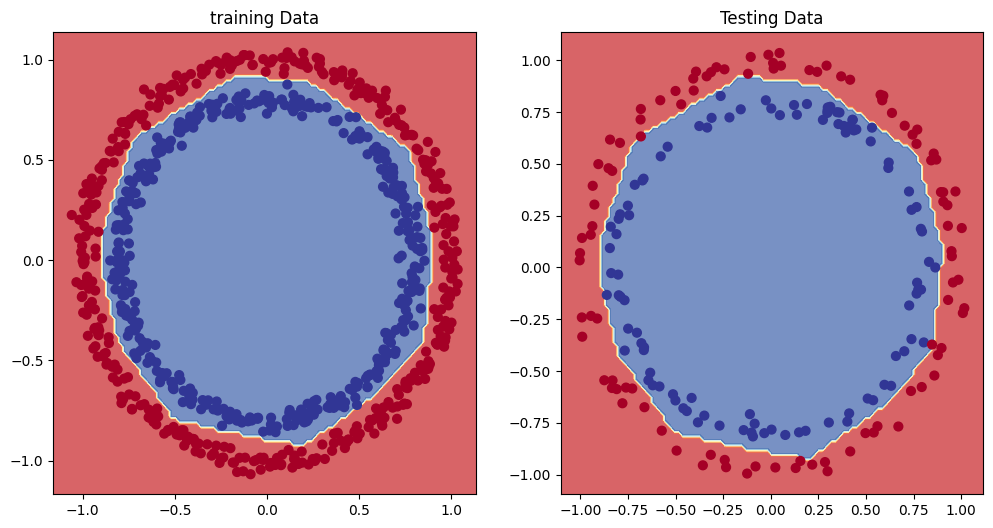

In [20]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model, X_test, y_test)

In [1]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model, X_test, y_test)


NameError: name 'plt' is not defined